In [1]:
import numpy as np
import ezgal
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_0.02_chab.model")

In [7]:
model.add_filter("/net/delft/data2/vakili/easy/i.dat" , "kids" , units = "nm")

In [8]:
def mstar(z):
    
    return 22.44+3.36*np.log(z)+0.273*np.log(z)**2-0.0618*np.log(z)**3-0.0227*np.log(z)**4

In [9]:
def function(zs):
    model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_0.02_chab.model")
    model.add_filter("/net/delft/data2/vakili/easy/i.dat" , "kids" , units = "nm")
    #model.set_normalization("kids", 0.2, cs(0.2), vega=False, apparent=True)
    kcorr_sloan = model.get_kcorrects(zf=3.0 , zs = 0.25 , filters = "sloan_i")
    model.set_normalization("sloan_i" , 0.25 , mstar(0.25)-kcorr_sloan, vega=False, apparent=True)
    zf = 3.0
    #zs=model.get_zs(zf)
    kcorr = model.get_kcorrects(zf=3.0, zs=zs , filters = "kids")
    mags = model.get_apparent_mags(zf=zf , filters = "kids" , zs= zs)
    return zs , mags , kcorr
"""
def function(Z):
    model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_"
                        +str(Z)+"_chab.model")
    #model.add_filter("/net/delft/data2/vakili/easy/i.dat" , "kids" , units = "nm")
    model.set_normalization("sloan_i", 0.25, cs(0.25), vega=False, apparent=True)
    zf = 3.0
    zs=model.get_zs(zf)
    mags = model.get_apparent_mags(zf , filters = "kids" , zs = zs)
    return zs , mags
"""    

'\ndef function(Z):\n    model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_"\n                        +str(Z)+"_chab.model")\n    #model.add_filter("/net/delft/data2/vakili/easy/i.dat" , "kids" , units = "nm")\n    model.set_normalization("sloan_i", 0.25, cs(0.25), vega=False, apparent=True)\n    zf = 3.0\n    zs=model.get_zs(zf)\n    mags = model.get_apparent_mags(zf , filters = "kids" , zs = zs)\n    return zs , mags\n'

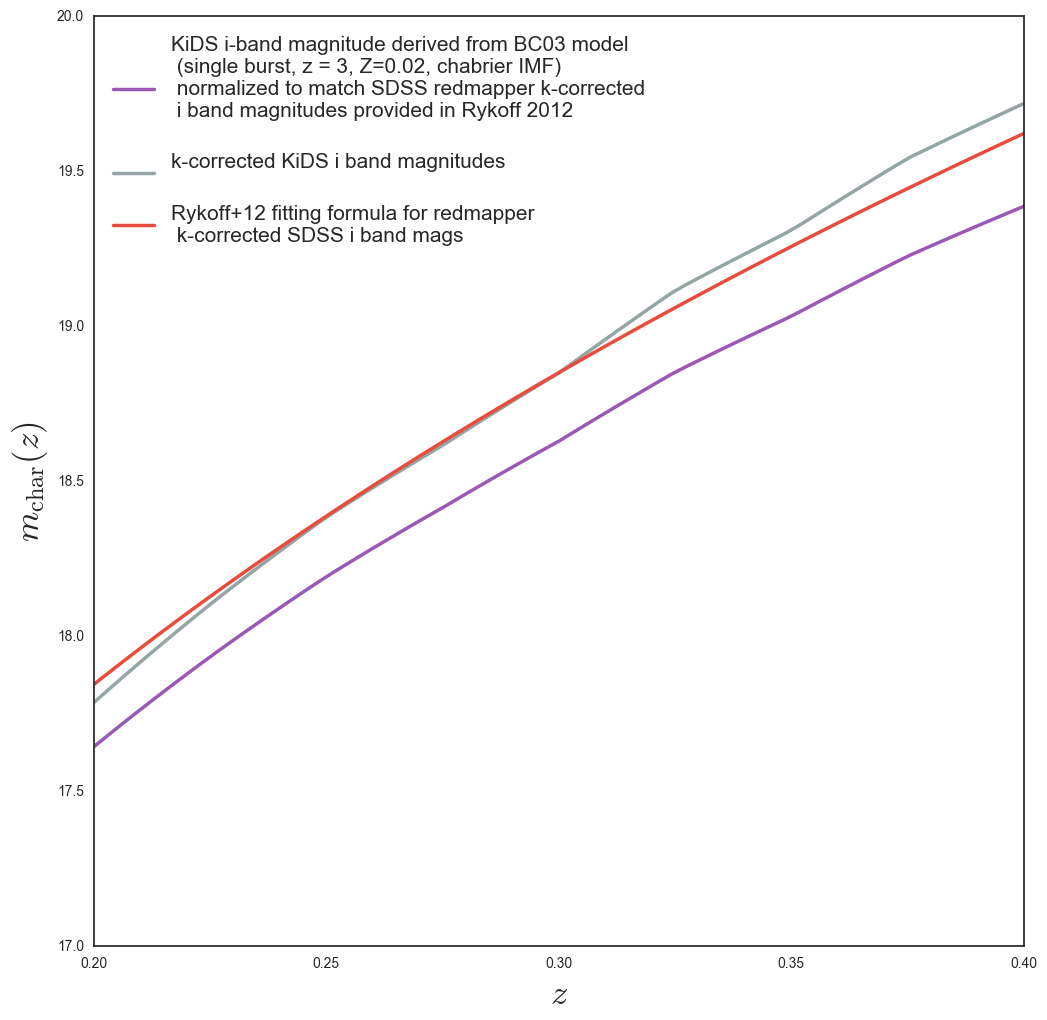

In [11]:
znew = np.linspace(0.1 , 0.4 , 100)
zs , mags , kcorr = function(znew)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(zs , mags , label = "KiDS i-band magnitude derived from BC03 model \n (single burst, z = 3, \
Z=0.02, chabrier IMF) \n normalized to match SDSS redmapper \
k-corrected \n i band magnitudes provided in Rykoff 2012 \n")
ax.plot(zs, mags + kcorr , label = "k-corrected KiDS i band magnitudes \n")
ax.plot(znew , mstar(znew) , label="Rykoff+12 fitting formula for redmapper \n k-corrected SDSS i band mags")
ax.set_ylim([17,20])
ax.set_xlim([0.2,0.4])
ax.set_ylabel(r"$m_{\mathrm{char}}(z)$" , fontsize =25)
ax.set_xlabel(r"$z$" , fontsize =25)
plt.legend(loc = "upper left" , fontsize = 15)

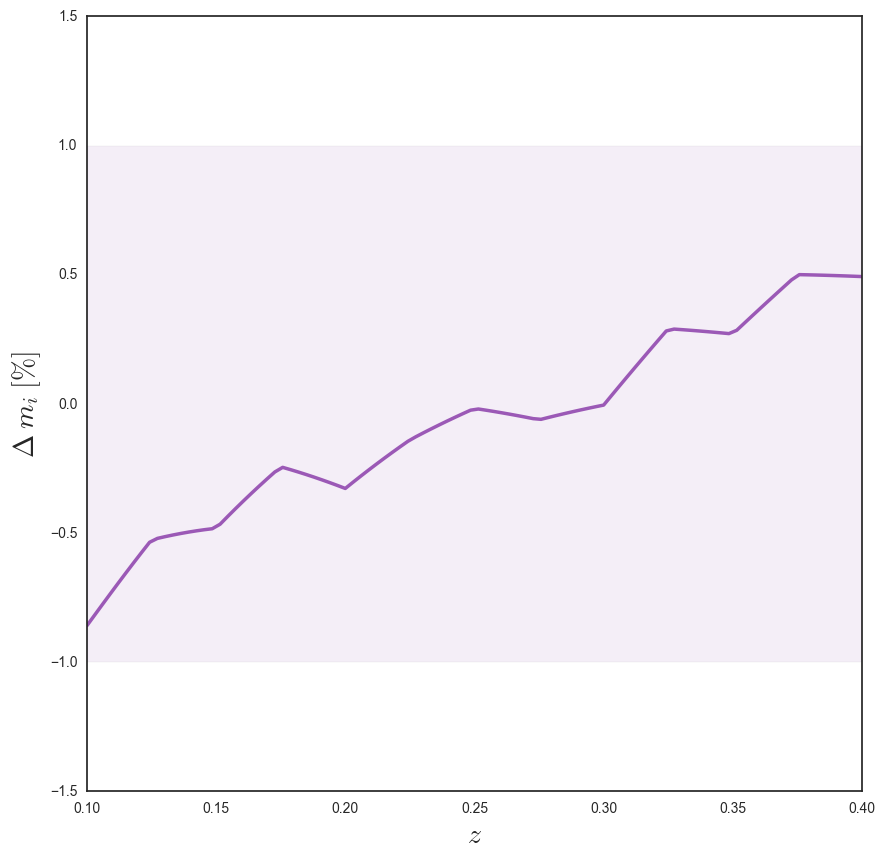

In [12]:
plt.figure(figsize=(10,10))
plt.plot(zs , (mags+kcorr - mstar(znew))*100 / mstar(znew))
plt.fill_between(zs , np.ones_like(zs) , -1.*np.ones_like(zs) , alpha =0.1)
plt.ylim([-1.5,1.5])
plt.ylabel(r"$ \Delta \; m_i \; [\%]$" , fontsize =20)
plt.xlabel(r"$z$" , fontsize =20)
#plt.title("Percentage difference between the k-corrected i-band magnitudes of Rykoff+12+SDSS+iband and Ezgal+KiDS i band")

/home/vakili/.local/lib/python2.7/site-packages/ezgal/cosmology.py:149: RuntimeWarning: divide by zero encountered in log10
  return 5. * num.log10(self.Dl(z) / self.pc / 10)


NameError: global name 'mstar' is not defined

(1521,)
[16.178167, 16.592293, 16.930326, 17.032785, 17.172121, 17.320305, 17.5123, 17.668816, 17.707241, 17.88686, 18.002956, 18.056829, 18.151535, 18.183426, 18.389839, 18.264088, 18.454912, 18.55806, 18.512251, 18.465038]
20


array(18.00295639038086)

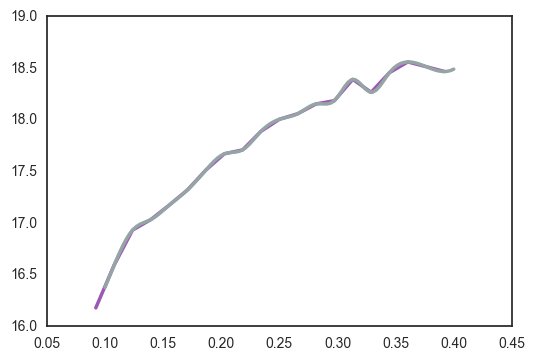

In [13]:
import sys
import kids_gama
from kids_gama import reference_magnitude
z_bcg , mi_bcg = reference_magnitude()
from scipy.interpolate import CubicSpline
cs = CubicSpline(z_bcg , mi_bcg)
plt.plot(z_bcg , mi_bcg)
plt.plot(znew , cs(znew))
cs(0.25)

equation (9) of https://arxiv.org/pdf/1303.3562.pdf

(3000, 10000.0)

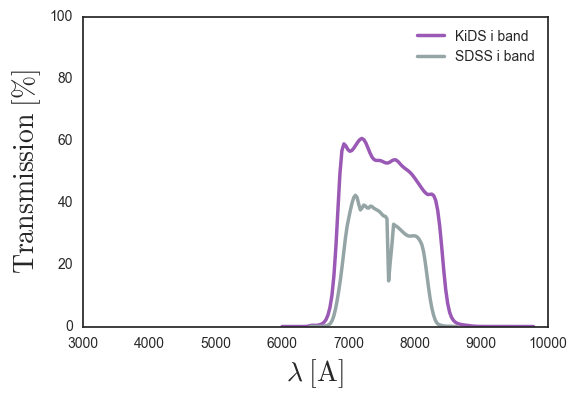

In [226]:
kids_i = np.loadtxt("/net/delft/data2/vakili/easy/i.dat")
sloan_i = np.loadtxt("/net/delft/data2/vakili/easyGalaxy/ezgal/data/filters/sloan_i")

plt.plot(kids_i[:,0]*10 , kids_i[:,1]*100, label = "KiDS i band" )
plt.plot(sloan_i[:,0] , sloan_i[:,1]*100 , label = "SDSS i band")
plt.xlabel("$\lambda\; [\mathrm{A}]$" , fontsize = 20)
plt.ylabel("$\mathrm{Transmission} \; [\%]$" , fontsize = 20)
plt.legend()
plt.ylim([0,100.0])
plt.xlim([3000,10000.0])

In [24]:
model = ezgal.model("/net/delft/data2/vakili/easy/ezgal_models/www.baryons.org/ezgal/models/bc03_burst_0.1_z_0.02_chab.model")


In [14]:
def p(m,z):
    
    mchar = function(z)[1]
    dm = m - mchar
    exp = 10. ** (-0.4 * dm)
    return (exp ** 2.) * np.exp(-1.*exp) 

def luminosity(m,z):
    
    mchar = function(z)[1]
    dm = m - mchar
    exp = 10. ** (-0.4 * dm)
    return exp

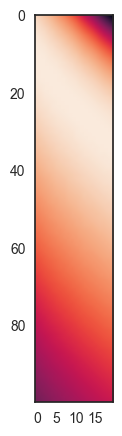

In [22]:
z = np.linspace(0.2,0.4,20)
m_array = np.linspace(16,24,100)
p_array = p(m_array[:,None] , z)
palette = itertools.cycle(sns.cubehelix_palette(20, light=0.6))

plt.figure(figsize=(5,5))
plt.imshow(np.log(p_array))

#for i in xrange(20):
#    plt.plot(m_array , np.log(p_array)[:,i], color= next(palette))
#    plt.xlabel(r"$m_{i}$" , fontsize = 20)
#    plt.ylabel(r"$\log \; p(m_{i}|z)$" , fontsize = 20)
#plt.ylim([-20,0])

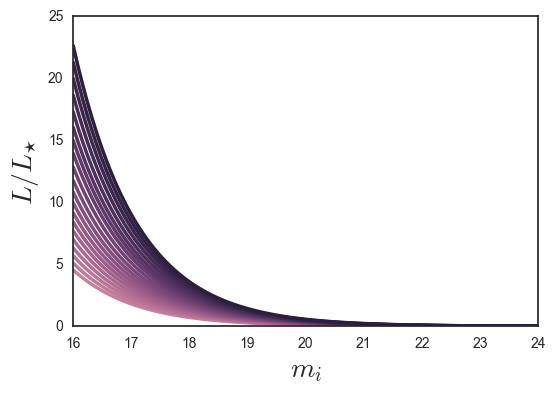

In [231]:
z = np.linspace(0.2,0.4,20)
m_array = np.linspace(16,24,100)
p_array = luminosity(m_array[:,None] , z)
palette = itertools.cycle(sns.cubehelix_palette(20, light=0.6))
for i in xrange(20):
    plt.plot(m_array , (p_array)[:,i] , color = next(palette))
    plt.xlabel(r"$m_{i}$" , fontsize = 20)
    plt.ylabel(r"$L/L_{\star}$" , fontsize = 20)

In [49]:
import cosmolopy
import cosmolopy.distance as cd
cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':1.0}
d_a = cd.angular_diameter_distance(1, **cosmo)
h = cd.e_z(1, **cosmo)  #E(z) = H(z)/H0
print d_a , h

def prior(z , norm):
    
    """p(z) \propto dV/dz = 
       (1+z)**2 DA(z)**2 c H**-1(z)
    """
    cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':1.0}
    d_a = cd.angular_diameter_distance(z, **cosmo)
    h = cd.e_z(z, **cosmo)
    dvdz = (1+z)**2. * d_a **2  * h **-1.
    
    return d_a , h , dvdz/norm

1156.34008206 1.76068168617


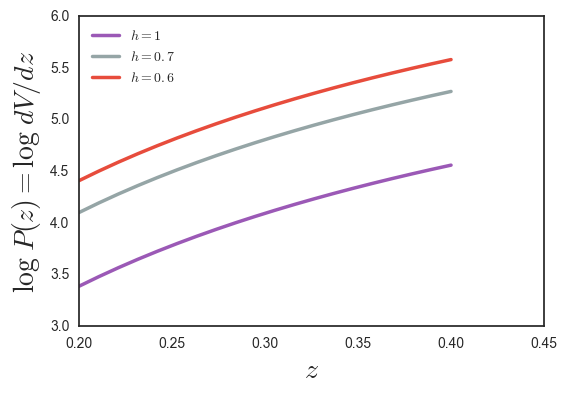

In [233]:
z = np.linspace(0.2,0.4,20)
d_a , h , dvdz = prior(z , 1)

plt.plot(z , np.log(prior(z,1)[2]) , label = "$h=1$")
plt.plot(z , np.log(prior(z,0.7)[2]) , label = "$h=0.7$")
plt.plot(z , np.log(prior(z,0.6)[2]) , label = "$h=0.6$")
plt.xlabel(r"$z$" , fontsize = 20)
plt.ylabel(r"$\log \; P(z) = \log \; dV/dz$" , fontsize = 20)
plt.legend(loc="upper left")

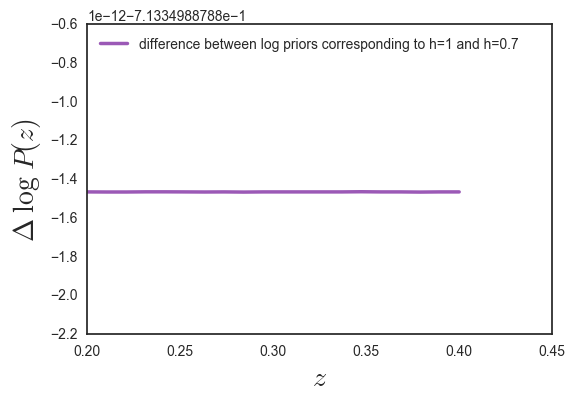

In [234]:
plt.plot(z , np.log(prior(z,1)[2]) - np.log(prior(z,0.7)[2]) , label = "difference between log priors corresponding to h=1 and h=0.7")
#plt.plot(z , np.log(prior(z,1)[2]) - np.log(prior(z,0.6)[2]) , label = "$h=1$")

plt.xlabel(r"$z$" , fontsize = 20)
plt.ylabel(r"$\Delta \;\log \; P(z)$" , fontsize = 20)
plt.legend(loc="upper left")

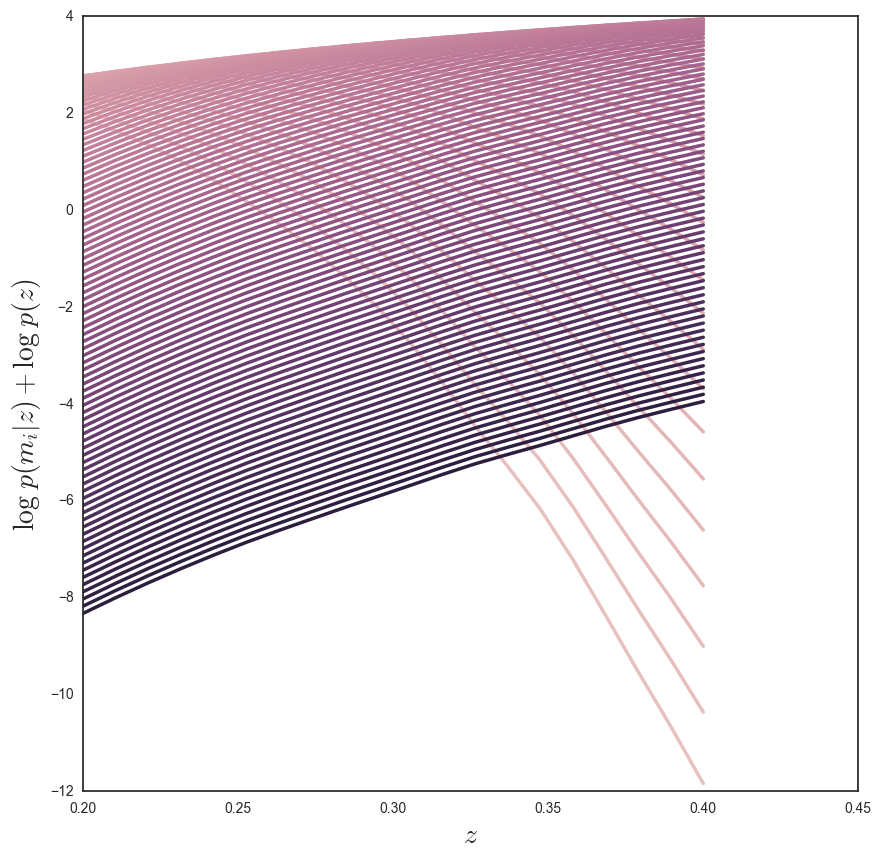

In [242]:
mags = np.linspace(16,24,100)
palette = itertools.cycle(sns.cubehelix_palette(100, light=0.8))
plt.figure(figsize=(10,10))
for i in xrange(0,100):
    #print mags[i]
    plt.plot(z , np.log(p(mags[i] , z)) + np.log(prior(z,1)[2]) , color = next(palette))
    plt.ylabel(r"$\log \; p(m_{i}|z) + \log \; p(z)$" , fontsize = 20)
    plt.xlabel(r"$z$" , fontsize = 20)

Now we demonstrate how we can generate p(c|m,z) via the best fit results we found by our red-sequence modeling 
stuff

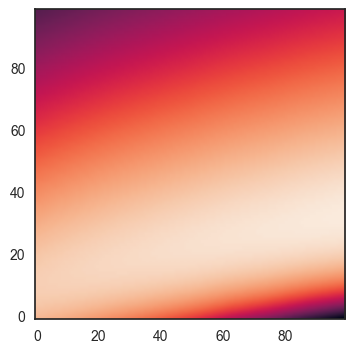

In [93]:
z = np.linspace(0.2,.4,100)
mags = np.linspace(16,24,100)
palette = itertools.cycle(sns.cubehelix_palette(100, light=0.8))
plt.imshow(np.log(p(mags[:,None], z)) + np.log(prior(z,10)[2]) , origin = "lower")
#plt.colorbar()

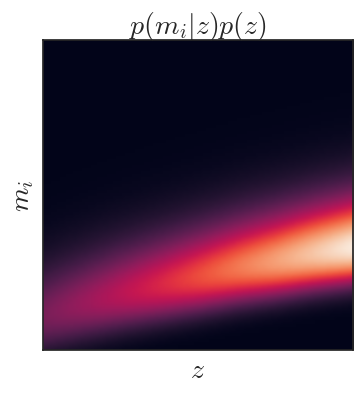

In [102]:
plt.imshow(np.exp(np.log(p(mags[:,None], z)) + np.log(prior(z,10000)[2])) , origin = "lower")
#plt.colorbar()
plt.xlabel(r"$z$" , fontsize= 20)
plt.ylabel(r"$m_i$" , fontsize = 20)
plt.xticks([])
plt.yticks([])
plt.title(r"$p(m_i|z)p(z)$" , fontsize = 20)

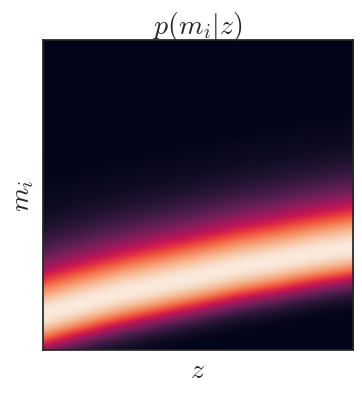

In [101]:
plt.imshow(np.exp(np.log(p(mags[:,None], z))) , origin = "lower")
plt.xlabel(r"$z$" , fontsize= 20)
plt.ylabel(r"$m_i$" , fontsize = 20)
plt.xticks([])
plt.yticks([])
plt.title(r"$p(m_i|z)$" , fontsize = 20)

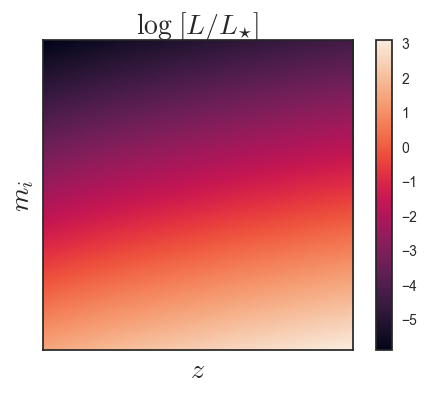

In [100]:
plt.imshow(np.log(luminosity(mags[:,None], z)) , origin = "lower")
plt.xlabel(r"$z$" , fontsize= 20)
plt.ylabel(r"$m_i$" , fontsize = 20)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title(r"$\log \; [L/L_{\star}]$" , fontsize = 20)